# EXERCISE 3

The data of `ESE06_ex3.csv` report the daily changes of the General Motors Co. closing prices since September 4, 1998 to November 27, 1998. 
1. Design a suitable quality control tool by assuming the
existence of an assignable cause for the OOC observations if any. 
2. Determine if the values reported in the array `new_obs` are IC (use the previously designed control chart point 1). 
`new_obs = np.array((1.327, 1.594, 0.716, 1.767, 0.915, 2.524, 0.563, 2.053))`

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('ESE06_ex3.csv')

# Inspect the dataset
data.head()

,GM
0,-0.875
1,2.437
2,-1.187
3,-2.063
4,0.938


## Point 1

Design a suitable quality control tool (by using run rules too) by assuming the existence of an assignable cause for the OOC observations (if any).

> ### Solution
>
> Let's plot the data first.

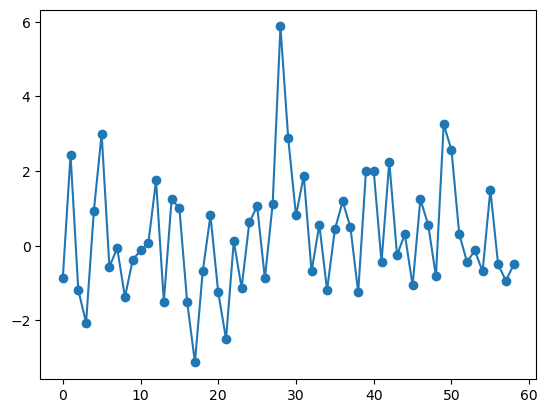

In [2]:
# Plot the data
plt.plot(data, 'o-')
plt.show()

> Looks like there's one point with a value much higher than the others. But let's test all assumptions first.

> Perform the runs test to check if the data are random. Use the `runstest_1samp` function from the `statsmodels` package.

In [3]:
# Verify if the data are random with runs test
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data['GM'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))


Runs test p-value = 0.879


> Plot the autocorrelation and partial autocorrelation functions of the data. Use the `plot_acf` and `plot_pacf` functions from the `statsmodels` package.

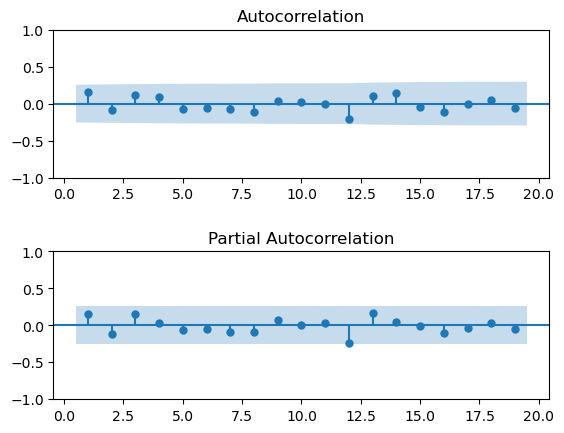

In [4]:
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['GM'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['GM'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

> From the results of the autocorrelation and the runs tests, there is no statistical evidence to assume non randomness of the process. 

> Now let's verify the normality assumption. 

Shapiro-Wilk test p-value = 0.068


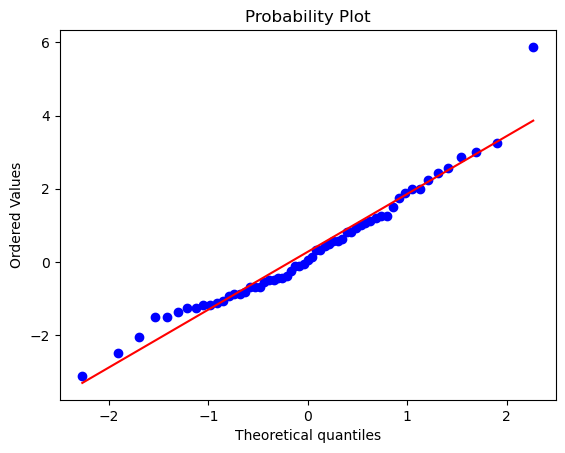

In [5]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data['GM'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data['GM'], dist="norm", plot=plt)
plt.show()

> We cannot reject the null hypothesis that the data are normally distributed with confidence 95%. However, one point deserves attention, as it is responsible for borderline normality.

> Let's go ahead with the design of the I-MR control chart. 
>
> Remember, the computation of moving ranges $MR$:
> 1. Compute the differences between consecutive observations (lag = 1): $D_i = X_{i+1} - X_i$.
> 2. Compute the absolute values of the differences: $MR = |D_i|$.


In [6]:
# Compute the moving ranges using the diff function
data['MR'] = data['GM'].diff().abs()

# Print out descriptive statistics of MR and time
data.describe()

,GM,MR
count,59.000000,58.000000
mean,0.275424,1.743603
std,1.581153,1.091674
min,-3.125000,0.000000
25%,-0.844000,0.749500
50%,0.062000,1.718500
75%,1.156500,2.484500
max,5.875000,4.750000


> Now let's make the control chart for the mean of the moving ranges.
>
> Remember the formulas for the control limits.
>
> **I chart**:
> - $UCL = \bar{x} + 3 \left(\frac{\bar{MR}}{d_2} \right)$
> - $CL = \bar{x}$
> - $LCL = \bar{x} - 3 \left(\frac{\bar{MR}}{d_2} \right)$
>
> **MR chart**:
> - $UCL = D_4 \bar{MR}$
> - $CL = \bar{MR}$
> - $LCL = 0$

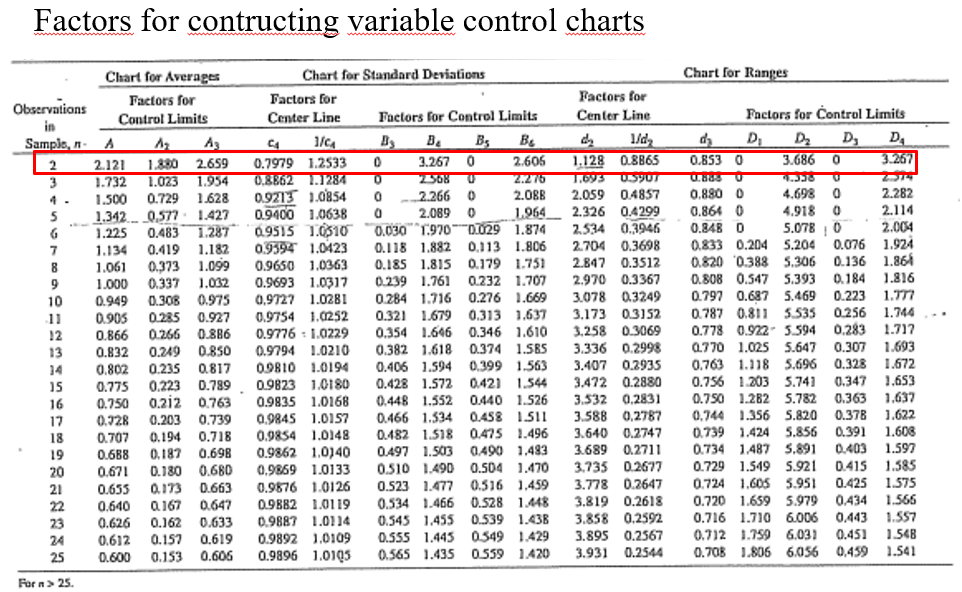

In [7]:
# Define the control limits
d2 = 1.128
D4 = 3.267

# make a copy of the data
df = data.copy()
# change the name of the column time to I
df.rename(columns={'GM':'I'}, inplace=True)

# Print the first 5 rows of the new dataframe
df.head()

,I,MR
0,-0.875,NaN
1,2.437,3.312
2,-1.187,3.624
3,-2.063,0.876
4,0.938,3.001


In [8]:
# Create columns for the upper and lower control limits
df['I_UCL'] = df['I'].mean() + (3*df['MR'].mean()/d2)
df['I_CL'] = df['I'].mean()
df['I_LCL'] = df['I'].mean() - (3*df['MR'].mean()/d2)
df['MR_UCL'] = D4 * df['MR'].mean()
df['MR_CL'] = df['MR'].mean()
df['MR_LCL'] = 0

# Print the first 5 rows of the new dataframe
df.head()

,I,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL
0,-0.875,NaN,4.912667,0.275424,-4.361819,5.696352,1.743603,0
1,2.437,3.312,4.912667,0.275424,-4.361819,5.696352,1.743603,0
2,-1.187,3.624,4.912667,0.275424,-4.361819,5.696352,1.743603,0
3,-2.063,0.876,4.912667,0.275424,-4.361819,5.696352,1.743603,0
4,0.938,3.001,4.912667,0.275424,-4.361819,5.696352,1.743603,0


In [9]:

# Define columns for possible violations of the control limits
df['I_TEST1'] = np.where((df['I'] > df['I_UCL']) | 
                (df['I'] < df['I_LCL']), df['I'], np.nan)
df['MR_TEST1'] = np.where((df['MR'] > df['MR_UCL']) | 
                (df['MR'] < df['MR_LCL']), df['MR'], np.nan)

# Print the first 5 rows of the new dataframe
df.head()

,I,MR,I_UCL,I_CL,I_LCL,MR_UCL,MR_CL,MR_LCL,I_TEST1,MR_TEST1
0,-0.875,NaN,4.912667,0.275424,-4.361819,5.696352,1.743603,0,NaN,NaN
1,2.437,3.312,4.912667,0.275424,-4.361819,5.696352,1.743603,0,NaN,NaN
2,-1.187,3.624,4.912667,0.275424,-4.361819,5.696352,1.743603,0,NaN,NaN
3,-2.063,0.876,4.912667,0.275424,-4.361819,5.696352,1.743603,0,NaN,NaN
4,0.938,3.001,4.912667,0.275424,-4.361819,5.696352,1.743603,0,NaN,NaN


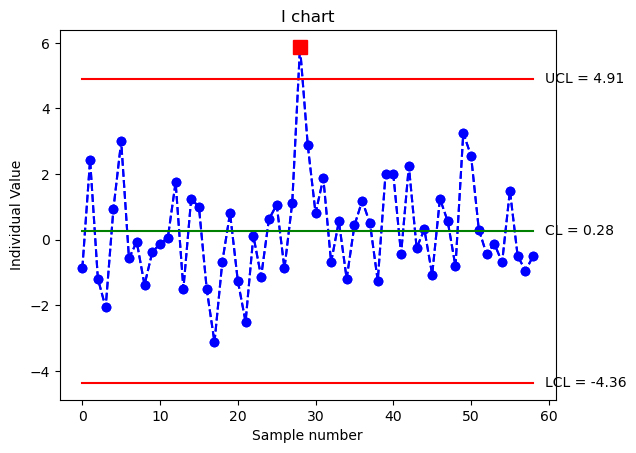

In [10]:
# Plot the I chart
plt.title('I chart')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I'], color='b', linestyle='--', marker='o')
plt.plot(df['I_UCL'], color='r')
plt.plot(df['I_CL'], color='g')
plt.plot(df['I_LCL'], color='r')
plt.ylabel('Individual Value')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['I_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['I_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_CL'].iloc[0], 'CL = {:.2f}'.format(df['I_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['I_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['I_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['I_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

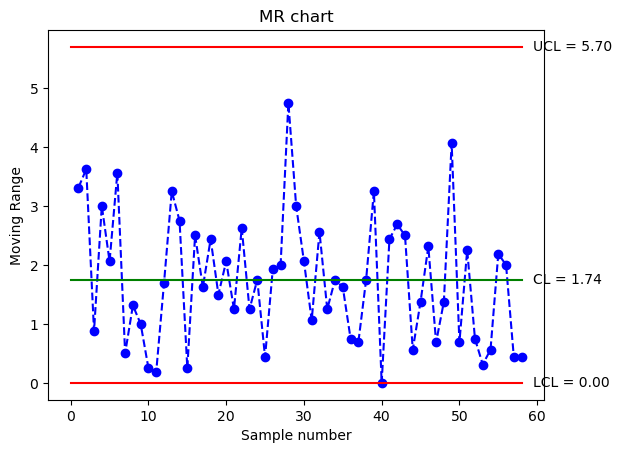

In [11]:
plt.title('MR chart')
plt.plot(df['MR'], color='b', linestyle='--', marker='o')
plt.plot(df['MR_UCL'], color='r')
plt.plot(df['MR_CL'], color='g')
plt.plot(df['MR_LCL'], color='r')
plt.ylabel('Moving Range')
plt.xlabel('Sample number')
# add the values of the control limits on the right side of the plot
plt.text(len(df)+.5, df['MR_UCL'].iloc[0], 'UCL = {:.2f}'.format(df['MR_UCL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_CL'].iloc[0], 'CL = {:.2f}'.format(df['MR_CL'].iloc[0]), verticalalignment='center')
plt.text(len(df)+.5, df['MR_LCL'].iloc[0], 'LCL = {:.2f}'.format(df['MR_LCL'].iloc[0]), verticalalignment='center')
# highlight the points that violate the alarm rules
plt.plot(df['MR_TEST1'], linestyle='none', marker='s', color='r', markersize=10)
plt.show()

> There is one point outside the control limits. 

> You can also design the control chart using the `IMR` function in `qda.ControlCharts` package.

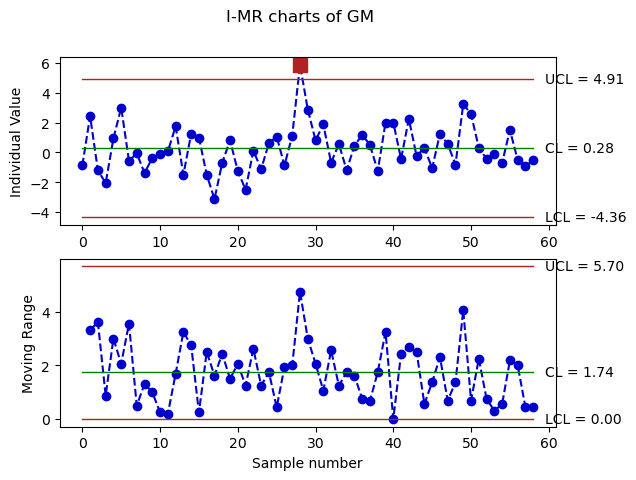

In [12]:
data_IMR = qda.ControlCharts.IMR(data, 'GM')

> Let's find the index of the OOC point.

In [13]:
# Find the index of the I_TEST1 column different from NaN
OOC_idx = np.where(data_IMR['I_TEST1'].notnull())[0]
# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))

The index of the OOC point is: [28]


Index 28 (i.e. **the 29th** observation) is the one that is out of control.

> Assume we found an assignable cause for the OOC point, we have to remove it from the data.

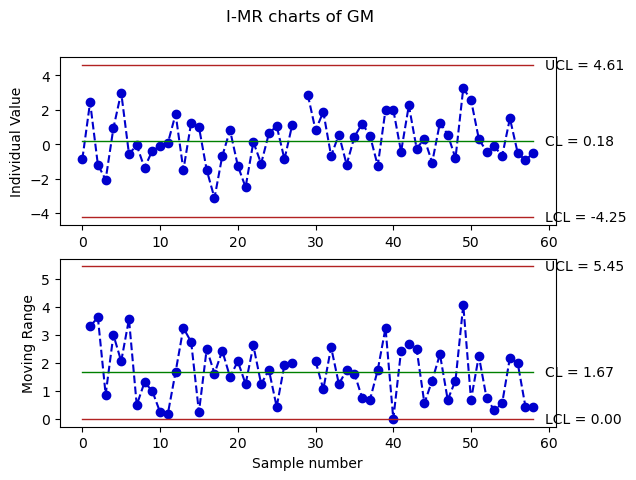

In [14]:
# make a copy of the data
data_2 = data.copy()
# replace the OOC point with NaN
data_2['GM'].iloc[OOC_idx] = np.nan

# Plot the new control chart
data_IMR_2 = qda.ControlCharts.IMR(data_2, 'GM')

## Point 2

Determine if the values reported in the array `new_obs` are IC (use the previously designed control chart point 1).

In [15]:
pd.__version__

'1.3.5'

In [16]:
# Import the dataset
data = pd.read_csv('ESE06_ex3.csv')
# replace the OOC point with NaN
data['GM'].iloc[OOC_idx] = np.nan

# Define the array with the new observations
new_obs = np.array((1.327, 1.594, 0.716, 1.767, 0.915, 2.524, 0.563, 2.053))

# Add the new observations to the dataset
new_data = pd.concat([data, pd.DataFrame(new_obs, columns=['GM'])], ignore_index=True)

new_data.tail(10)

,GM
57,-0.937
58,-0.500
59,1.327
60,1.594
61,0.716
62,1.767
63,0.915
64,2.524
65,0.563
66,2.053


Use the parameter `subset_size` to specify the number of observations to be used for the computation of the control limits (Phase 1 data).

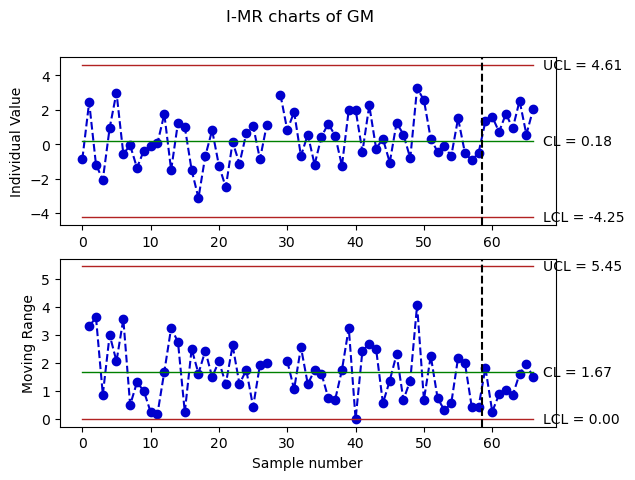

In [17]:
new_data_IMR = qda.ControlCharts.IMR(new_data, 'GM', subset_size=len(data))

The new data (Phase II) are in-control